## Lab1 : Potential Function
___


### Import Dependencies

In [127]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


### Configuration          
- **PATH_TO_IMAGE** : &nbsp; &nbsp; &nbsp; directory path to the map
- **START** : &nbsp; &nbsp; &nbsp; starting position [x,y]
- **GOAL** :  &nbsp; &nbsp; &nbsp; goal position [x,y]
- **Q**: &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; parameter of repulsive function
- **WAVEFRONT_TYPE** : 
    - 0 &nbsp; &nbsp; &nbsp;for &nbsp; &nbsp; &nbsp; 4 connectivity
    - 1 &nbsp; &nbsp; &nbsp;for &nbsp; &nbsp; &nbsp; 8 connectivity
    - 2 &nbsp; &nbsp; &nbsp;for &nbsp; &nbsp; &nbsp;euclidean distance
- **BUSHFIRE_TYPE** : 
    - 0 &nbsp; &nbsp; &nbsp; for &nbsp; &nbsp; &nbsp; 4 connectivity
    - 1 &nbsp; &nbsp; &nbsp; for &nbsp; &nbsp; &nbsp; 8 connectivity
    - 2 &nbsp; &nbsp; &nbsp; for &nbsp; &nbsp; &nbsp; euclidean distance

In [128]:
PATH_TO_IMAGE = './data/map0.png'
START = [10,10]
GOAL = [90,70]
Q = 4
WAVEFRONT_TYPE = 2
BUSHFIRE_TYPE = 2

## Wavefront Class

In [129]:
class WaveFrontAlgo():
    def __init__(self) -> None:
        pass

    def isOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
            
    def isValid(self,index, map):
        if self.isOutofBound(index,map):
            if map[index[0],index[1]] == 1: # Check Obstacle
                return False
            else: # apart from value 1 is valid
                return True
        else:
            return False
                        
    def isRightPath(self,origin,index, map):
        try:
                if index[0] < 0 or index[1] < 0:
                    return False
                if map[index[0],index[1]] < origin and map[index[0],index[1]] != 1:
                    return True
                else:
                    return False
           
        except:
            return False
        
    

    def wavefront_planner_connect_4(self, grid_map:np.array, goal:list):
        """
        Create attraction function with 4-connectivity Wavefront 
        """
        motions = [[-1,0],[1,0],[0,-1],[0,1]] # Up, Down, Left, Right
        
        goal_value = 2 
        goal_row = goal[0]
        goal_col = goal[1] 
        queue = [goal]
        
        # manually assign goal value in map 
        grid_map[goal_row,goal_col] = goal_value 
        #print(grid_map)

        # Start Wavefront loop 
        while queue:
            goal_value = goal_value + 1
            new_queue = []
            
            for p in queue:
                for m in motions:
                    index = [p[0]+m[0],p[1]+m[1]] 
                   # print(index)
                    if self.isValid(index, grid_map):
                        old_goal_value = grid_map[index[0],index[1]]
                        new_goal_value = goal_value 
                        if old_goal_value == 0: # Not explored space just fill in first
                            grid_map[index[0],index[1]] =  new_goal_value
                            new_queue.append(index)
                        elif old_goal_value > new_goal_value: # New value is a shorter path 
                            grid_map[index[0],index[1]] =  new_goal_value
                            new_queue.append(index)
                    
            queue = new_queue
            #print(grid_map)

        final_map = grid_map
        return final_map
    
    def wavefront_planner_connect_8(self, grid_map:np.array, goal:list):
        """
        Create attraction function with 8-connectivity Wavefront 
        """
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals
        
        goal_value = 2 
        goal_row = goal[0]
        goal_col = goal[1] 
        queue = [goal]
        
        # manually assign goal value in map 
        grid_map[goal_row,goal_col] = goal_value 
        #print(grid_map)

        # Start Wavefront loop 
        while queue:
            goal_value = goal_value + 1
            new_queue = []
            
            for p in queue:
                for m in motions:
                    index = [p[0]+m[0],p[1]+m[1]] 
                   
                    if self.isValid(index, grid_map):
                        old_goal_value = grid_map[index[0],index[1]]
                        new_goal_value = goal_value 
                        if old_goal_value == 0: # Not explored space just fill in first
                            grid_map[index[0],index[1]] =  new_goal_value
                            new_queue.append(index)
                        elif old_goal_value > new_goal_value: # New value is a shorter path 
                            grid_map[index[0],index[1]] =  new_goal_value
                            new_queue.append(index)

            queue = new_queue
            #print(grid_map)

        final_map = grid_map
        return final_map
    
    def wavefront_planner_euclidean(self, grid_map:np.array, goal:list):
        """
        Create attraction function with 8-connectivity Wavefront 
        """
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals
        
        goal_value = 2 
        goal_row = goal[0]
        goal_col = goal[1] 
        queue = [goal]
        
        # manually assign goal value in map 
        grid_map[goal_row,goal_col] = goal_value 
        #print(grid_map)

        # Start Wavefront loop 
        while queue:
            new_queue = []
            
            for p in queue:
                goal_value = grid_map[p[0],p[1]]
                for m in motions:
                    index = [p[0]+m[0],p[1]+m[1]] 
                   # print(index)
                    if self.isValid(index, grid_map):
                        old_goal_value = grid_map[index[0],index[1]]
                        new_goal_value = goal_value + ((index[0] - p[0])**2+(index[1] - p[1])**2)**0.5
                        if old_goal_value == 0: # Not explored space just fill in first
                            grid_map[index[0],index[1]] =  new_goal_value
                            new_queue.append(index)
                        elif old_goal_value > new_goal_value: # New value is a shorter path 
                            grid_map[index[0],index[1]] =  new_goal_value
                            new_queue.append(index)
                        
                        
                    
            queue = new_queue
            #print(grid_map)

        final_map = grid_map
        return final_map
      

                            

## BrushFire Class

In [130]:
class BrushFireAlgo():
    def __init__(self) -> None:
        pass
    
    def isOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
        
    def isValid(self,index, map):
        if self.isOutofBound(index,map):
            if map[index[0],index[1]] == 1: # Check Obstacle
                return False
            else: # apart from value 1 is valid
                return True
        else:
            return False
                        

    def brushfire_connect_4(self, grid_map:np.array):
        """
        Create Brushfire function with 4-connectivity 
        """
        motions = [[-1,0],[1,0],[0,-1],[0,1]] # Up, Down, Left, Right
        current_value = 1

        while np.any(grid_map==0):
            new_value = current_value +1
            for i in range(grid_map.shape[0]):
                for j in range(grid_map.shape[1]):
                    if grid_map[i,j] == current_value:
                        for m in motions:
                            index = [i+m[0],j+m[1]]
                            if self.isValid(index,grid_map):
                                if new_value < grid_map[index[0],index[1]] or grid_map[index[0],index[1]] ==0 :
                                    grid_map[index[0],index[1]] = new_value
            
            current_value = new_value

        return grid_map
    
    def brushfire_connect_8(self, grid_map:np.array):
        """
        Create Brushfire function with 4-connectivity 
        """
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] 
        current_value = 1

        while np.any(grid_map==0):
            new_value = current_value +1
            for i in range(grid_map.shape[0]):
                for j in range(grid_map.shape[1]):
                    if grid_map[i,j] == current_value:
                        for m in motions:
                            index = [i+m[0],j+m[1]]
                            if self.isValid(index,grid_map):
                                if new_value < grid_map[index[0],index[1]] or grid_map[index[0],index[1]] ==0 :
                                    grid_map[index[0],index[1]] = new_value
            
            current_value = new_value

        return grid_map
    
    def brushfire_euclidean(self, grid_map:np.array):
        """
        Create Brushfire function with 4-connectivity 
        """
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] 
        obstacle_value = 1
        queue = []
        while np.any(grid_map==0):
            if not queue : # First Iteration -- Fill the value around obstacle
                for i in range(grid_map.shape[0]):
                    for j in range(grid_map.shape[1]):
                        if grid_map[i,j] == obstacle_value: 
                            for m in motions:
                                index = [i+m[0],j+m[1]]
                                if self.isValid(index,grid_map):
                                    new_value = obstacle_value + ((index[0] - i)**2+(index[1] - j)**2)**0.5
                                    if new_value < grid_map[index[0],index[1]] or grid_map[index[0],index[1]] ==0 :
                                         grid_map[index[0],index[1]] = new_value
                                    
                                         queue.append(index)
            else: # Other Iteration 
                new_queue = []
                for q in queue:
                    current_value = grid_map[q[0],q[1]]
                    for m in motions:
                        index = [q[0]+m[0],q[1]+m[1]]
                        if self.isValid(index,grid_map):
                            new_value = current_value + ((index[0] - q[0])**2+(index[1] - q[1])**2)**0.5
                            if new_value < grid_map[index[0],index[1]] or grid_map[index[0],index[1]] ==0 :
                                grid_map[index[0],index[1]] = new_value
                                new_queue.append(index)
                    
            
                queue = new_queue

        return grid_map
                        
    def repulsive_function(self,grid_map:np.array, q:float):
        """
        Create repulsive function with Q threshold 
        """
        for i in range(grid_map.shape[0]):
                for j in range(grid_map.shape[1]):
                    if grid_map[i,j] == 1:
                        pass
                    elif grid_map[i,j] <= q:
                        grid_map[i,j] = 4*((1/grid_map[i,j]) - (1/q))**2
                    else:
                        grid_map[i,j] = 0

                    
        return grid_map
                 

## PathFinder Class

In [131]:
class PathFinder():  
    def __init__(self) -> None:
        pass

    def isOutofBound(self,index, map):
        try: #Check out of bound for exceeded index
            if index[0] < 0 or index[1] < 0 or index[0]>=map.shape[0] or index[1]>=map.shape[1]: #Check out of bound for -1 index
                return False
            else:
                return True
        except:
                return False
      
    def find_the_path_4(self,map:np.array, start:list):
        #Check the neighbor 
        motions = [[-1,0],[1,0],[0,-1],[0,1]] # Up, Down, Left, Right

        queue = [start[0] , start[1]]
        path = [start]
        while queue:
            new_queue = []
            origin = map[queue[0],queue[1]]
            
            value_list = []
            index_list = []
            for m in motions:
                index = [queue[0]+m[0],queue[1]+m[1]] 
                
                if self.isOutofBound(index, map):
                    value = map[index[0],index[1]]
                    if value < origin:
                        value_list.append(value)
                        index_list.append(index)
            if index_list:
                selected_index = index_list[np.argmin(value_list)] #choose the lowest value as a path
                new_queue = selected_index
                path.append(selected_index)
                           
            queue = new_queue
        return path
        
    def find_the_path_8(self,map:np.array, start:list):
        #Check the neighbor 
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals

        queue = [start[0] , start[1]]
        path = [start]
        while queue:
            new_queue = []
            origin = map[queue[0],queue[1]]
            
            value_list = []
            index_list = []
            for m in motions:
                index = [queue[0]+m[0],queue[1]+m[1]] 
                
                if self.isOutofBound(index, map):
                    value = map[index[0],index[1]]
                    if value < origin:
                        value_list.append(value)
                        index_list.append(index)
            if index_list:
                selected_index = index_list[np.argmin(value_list)] #choose the lowest value as a path
                new_queue = selected_index
                path.append(selected_index)
                           
            queue = new_queue
        return path
    
    def find_lcoal_minimum(self,map:np.array):
        #Check the neighbor 
        motions = [[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]] # Up, Down, Left, Right, All Diagonals
        local_min_list = []
        for i in range(map.shape[0]):
            for j in range(map.shape[1]):
                value = map[i, j] 
                if value < map.max() -0.00001: 
                    for m in motions:
                        is_local_min = True
                        n_index = [i+m[0],j+m[1]] 
                        if self.isOutofBound(n_index, map):
                            n_value = map[n_index[0],n_index[1]]
                            if n_value < map.max()-0.00001:  #not obstacle
                                if n_value < value  :
                                    is_local_min = False
                                    break
                    
                    if is_local_min:
                        local_min_list.append([i,j])

        return local_min_list                      

## Main Code

### Loading Configuration

In [132]:
image_path = PATH_TO_IMAGE
start = START
goal = GOAL

PF = PathFinder()
WF = WaveFrontAlgo()
wf_algo = [[WF.wavefront_planner_connect_4,PF.find_the_path_8],
           [WF.wavefront_planner_connect_8,PF.find_the_path_8],
           [WF.wavefront_planner_euclidean,PF.find_the_path_8]]
selected_wf_algo = wf_algo[WAVEFRONT_TYPE]

BF = BrushFireAlgo()
q = Q
bf_algo = [[BF.brushfire_connect_4,BF.repulsive_function],
           [BF.brushfire_connect_8,BF.repulsive_function],
           [BF.brushfire_euclidean,BF.repulsive_function]]
selected_bf_algo = bf_algo[BUSHFIRE_TYPE]

### Prepare Grid Map Data 

* Load grid map from image file

In [133]:
image = Image.open(image_path).convert('L')
grid_map = np.array(image.getdata()).reshape(image.size[0],image.size[1])/255

* Binarize the image into proper format

In [134]:
grid_map[grid_map > 0.5] = 1
grid_map[grid_map <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map = (grid_map * -1) + 1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

* Show grid map 


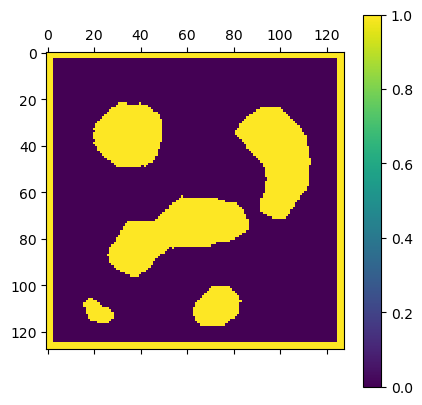

In [135]:
plt.matshow(grid_map)
plt.colorbar()
plt.show()

### Attractive Function

* find the attractive function using Wavefront Algorithm

In [137]:
result = selected_wf_algo[0](grid_map.copy(),goal)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

* normalize the data and visualization

In [138]:
result_normalized = result.copy()

max = result_normalized.max() 
min = result_normalized.min() 

result_normalized[result_normalized == 1]= max + 1 # Change the obstacle to the max value 
max = result_normalized.max() 
result_normalized= (result_normalized- min)/ (max) # Normalize to 0.0-1.0 which obstacle is 1
        


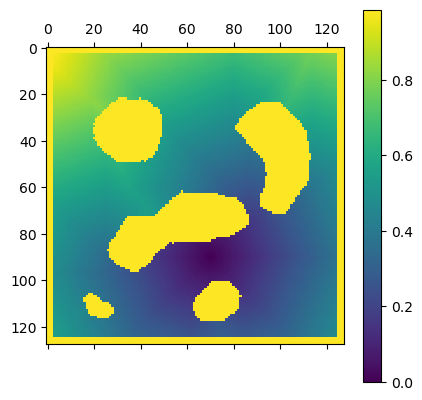

In [139]:
plt.matshow(result_normalized)
plt.colorbar()
plt.show()

* Find the path (only attractive function)

In [147]:
path = selected_wf_algo[1](result_normalized,start)    

print(path)
print("Path Distance: {}".format(len(path)))


[[10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15], [16, 16], [17, 17], [18, 18], [19, 19], [20, 20], [21, 21], [21, 22], [21, 23], [21, 24], [21, 25], [21, 26], [21, 27], [21, 28], [21, 29], [21, 30], [21, 31], [21, 32], [21, 33], [21, 34], [21, 35], [21, 36], [21, 37], [21, 38], [21, 39], [21, 40], [22, 41], [22, 42], [22, 43], [23, 44], [24, 45], [25, 46], [25, 47], [26, 48], [27, 49], [28, 50], [29, 51], [30, 52], [31, 53], [32, 54], [33, 55], [34, 56], [35, 57], [36, 58], [37, 59], [38, 60], [39, 61], [40, 62], [41, 63], [42, 64], [43, 65], [44, 66], [45, 67], [46, 68], [47, 69], [48, 70], [49, 71], [50, 72], [51, 73], [52, 74], [53, 75], [54, 76], [55, 77], [56, 78], [57, 79], [58, 80], [59, 81], [60, 82], [61, 83], [62, 84], [63, 85], [64, 86], [65, 87], [66, 87], [67, 87], [68, 87], [69, 87], [70, 87], [71, 87], [72, 87], [73, 87], [74, 87], [75, 87], [76, 87], [77, 86], [78, 85], [79, 84], [80, 83], [81, 82], [82, 81], [83, 80], [84, 79], [85, 78], [86, 77], [87, 76],

- Visualize the path

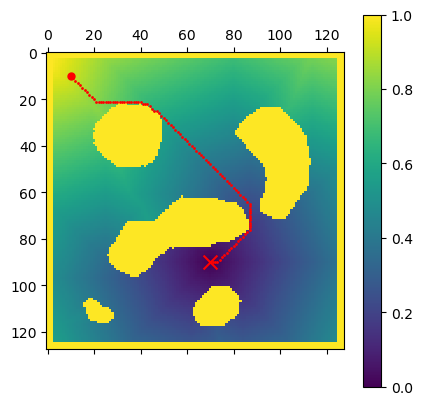

In [148]:

plt.matshow(result_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

path_np = np.array(path)
x,y = path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')


plt.colorbar()
plt.show()



- find the local minimum point

In [141]:
loc_min = PF.find_lcoal_minimum(result_normalized)
print(loc_min)


[[90, 70]]


## Repulsive Function

* Generate bushfire array from obstacle

In [142]:
bushfire_fx = selected_bf_algo[0](grid_map.copy())

- Visualize the Bushfire function

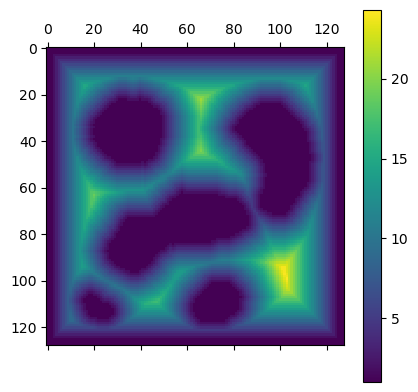

In [143]:
plt.matshow(bushfire_fx)
plt.colorbar()
plt.show()

- Generate repulsive function from bushfire array

In [ ]:
repulsive_fx = selected_bf_algo[1](bushfire_fx.copy(),q)

- Visualize Repulsive Function

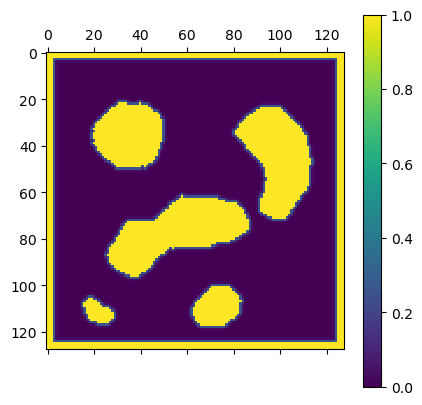

In [144]:
plt.matshow(repulsive_fx)
plt.colorbar()
plt.show()

## Attractive + Repulsive Function

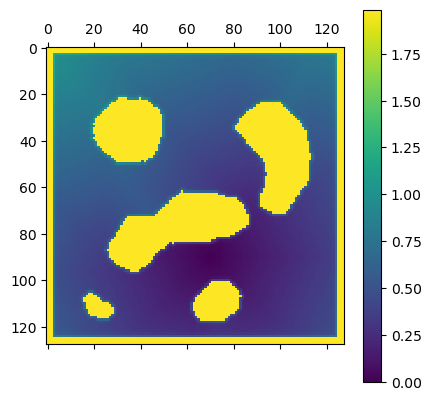

In [145]:
combined_map = result_normalized + repulsive_fx
combined_map_normalized = combined_map.copy()
max = combined_map_normalized.max() 
min = combined_map_normalized.min()
combined_map_normalized = (combined_map_normalized - min)/ (max)
        
plt.matshow(combined_map)
plt.colorbar()
plt.show()

[[90, 70]]


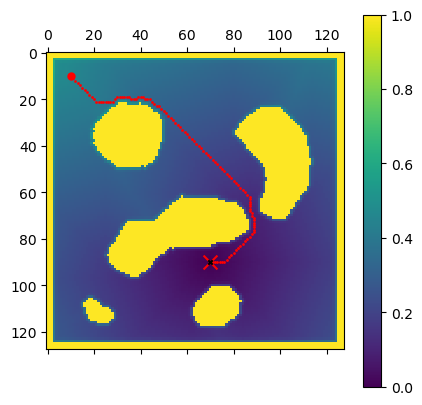

Path Distance: 141.23759005323586
112


In [146]:

plt.matshow(combined_map_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

path = selected_wf_algo[1](combined_map_normalized,start)    
path_np = np.array(path)
x,y = path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')

loc_min = PF.find_lcoal_minimum(combined_map)
print(loc_min)
local_np = np.array(loc_min)
x,y = local_np.T
Drawing_path = plt.scatter(y,x,s=10.0,c='black',marker='x')

plt.colorbar()
plt.show()

total_distance = 0
for i in range(len(path)-1):
    distance = ((path[i][0] - path[i+1][0])**2 + (path[i][1] - path[i+1][1])**2 )**0.5
    total_distance = total_distance + distance

print("Path Distance: {}".format(total_distance))
print(len(path))

